# Weeks 7 & 8

- Joshua Burden
- Bellevue University
- DSC540 Data Preparation
- Cathrine Williams
- 07/31/2022


### Complete the following exercises. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.


# Data Wrangling with Python: Activity 9, page 294

# What is Project Gutenberg? -
Project Gutenberg is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks". It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library. This longest-established ebook project releases books that entered the public domain, and can be freely read or downloaded in various electronic formats.

# What is this activity all about?
- This activity aims to scrape the url of the Project Gutenberg's Top 100 ebooks (yesterday's ranking) for identifying the ebook links.
- It uses BeautifulSoup4 for parsing the HTML and regular expression code for identifying the Top 100 ebook file numbers.
- You can use those book ID numbers to download the book into your local drive if you want


# Import necessary libraries including regex, and beautifulsoup

In [10]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

# Ignore SSL errors (this code will be given)

In [11]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# Read the HTML from the URL


In [12]:
# Read the HTML from the URL and pass on to BeautifulSoup
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

# Write a small function to check the status of web request


In [13]:
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [14]:
status_check(response)

Success!


1

# Decode the response and pass on to BeautifulSoup for HTML parsing

In [22]:
contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')

# Find all the href tags and store them in the list of links. Check how the list looks like - print first 30 elements

In [24]:
# Empty list to hold all the http links in the HTML page
lst_links=[]


In [25]:
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))


In [26]:
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

# Use regular expression to find the numeric digits in these links. These are the file number for the Top 100 books.


In [29]:
# Initialize empty list to hold the file numbers
booknum=[]

- Number 19 to 118 in the original list of links have the Top 100 ebooks' number.
- Loop over appropriate range and use regex to find the numeric digits in the link (href) string.
- Hint: Use findall() method


In [30]:
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

# Print the file numbers

In [31]:

print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1342, 4300, 1661, 11, 33283, 105, 2701, 68639, 345, 174, 1184, 98, 68641, 84, 68642, 2600, 2554, 2591, 5200, 6130, 1952, 30254, 64317, 1400, 768, 1260, 45, 1080, 4980, 38600, 68640, 32449, 76, 74, 1232, 120, 158, 27827, 58585, 514, 844, 1399, 28054, 996, 135, 35, 4363, 5740, 43, 2680, 46, 1497, 67098, 43453, 205, 16, 161, 25717, 219, 3206, 244, 10, 31284, 36, 68636, 27107, 55, 8492, 68638, 2852, 766, 2848, 2542, 2814, 730, 41, 68646, 863, 408, 1998, 8800, 236, 10007, 1727, 113, 68650]


# How does the soup object's text look like? Use .text() method and print only first 2000 characters (i.e. do not print the whole thing, it is long).
You will notice lot of empty spaces/blanks here and there. Ignore them. They are part of HTML page markup and its whimsical nature!

In [32]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-07-30166339
last 7 days1089191
last 30 days4465455



Top 100 EBooks yesterd

# Search in the extracted text (using regular expression) from the soup object to find the names of top 100 Ebooks (Yesterday's rank)


In [35]:
# Temp empty list of Ebook names
lst_titles_temp=[]


# Create a starting index. It should point at the text "Top 100 Ebooks yesterday". Hint: Use splitlines() method of the soup.text. It splits the lines of the text of the soup object.


In [36]:
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')


# Loop 1-100 to add the strings of next 100 lines to this temporary list.
- Hint: splitlines() method


In [38]:
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])


# Use regular expression to extract only text from the name strings and append to an empty list
- Hint: Use match and span to find indices and use them


In [39]:
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])


# Print the list of titles
    

In [ ]:
for l in lst_titles:
    print(l)

# Data Wrangling with Python: Activity 10, page 295
### Build your own movie database by reading from an API
This notebook does the following
- Retrieves and prints basic data about a movie (title entered by user) from the web (OMDB database)
- If a poster of the movie could be found, it downloads the file and saves at a user-specified location

In [42]:
import urllib.request, urllib.parse, urllib.error
import json

# Load the secret API key (you have to get one from OMDB website and use that, 1000 daily limit) from a JSON file, stored in the same folder into a variable
- Hint: Use json.loads()

Note: The following cell will not be executed in the solution notebook because the author cannot give out his private API key.
#### Students/users/instructor will need to obtain a key and store in a JSON file.
#### For the code's sake, we are calling this file APIkeys.json. But you need to store your own key in this file.
#### An example file called "APIkey_Bogus_example.json" is given along with the notebook. Just change the code in this file and rename as APIkeys.json. The file name does not matter of course.

In [44]:
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

Do the following,

- Assign the OMDB portal (http://www.omdbapi.com/?) as a string to a variable serviceurl (don't miss the ?)
- Create a variable apikey with the last portion of the URL ("&apikey=secretapikey"), where secretapikey is your own API key (an actual code)
- The movie name portion i.e. "t=movie_name" will be addressed later

In [45]:
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

# Write a utility function print_json to print nicely the movie data from a JSON file (which we will get from the portal)
Here are the keys of a JSON file,

'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language','Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID'

In [46]:
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

# Write a utility function to download a poster of the movie based on the information from the jason dataset and save in your local folder
- Use os module
- The poster data is stored in the JSON key 'Poster'
- You may want to split the name of the Poster file and extract the file extension only. Let's say the extension is 'jpg'.
- Then later join this extension to the movie name and create a filename like movie.jpg
- Use the Python command open to open a file and write the poster data. Close the file after done.
- This function may not return anything. It just saves the poster data as an image file.

In [66]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'//'+'Posters'+'//'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

# Write a utility function search_movie to search a movie by its name, print the downloaded JSON data (use the print_json function for this) and save the movie poster in the local folder (use save_poster function for this)
- Use try-except loop for this i.e. try to connect to the web portal, if successful proceed but if not (i.e. exception raised) then just print an error message
- Here use the previously created variables serviceurl and apikey
- You have to pass on a dictionary with a key t and the movie name as the corresponding value to urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL
- This URL will be used for accessing the data
- The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.

In [67]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

# Test search_movie function by entering Titanic

In [70]:
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=b5a31683
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,147,994
imdbID: tt0120338
--------------------------------------------------


# Test search_movie function by entering "Random_error" (obviously this will not be found and you should be able to check whether your error catching code is working properly)

In [63]:
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=b5a31683
Error encountered:  Movie not found!


# Look for a folder called 'Posters' in the same directory you are working in. It should contain a file called 'Titanic.jpg'. Open and see if the poster came alright!

# Connect to the Twitter API and do a simple data pull
- a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment)
- b. Sign in to apps.twitter.com
- c. Click “Create New App”
- d. Give your app a name and description
- e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until the last minute to complete this portion of the assignment
- f. Create an access token
- g. You should receive a consumer key and a token
- h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)
- i. How to Create a Twitter App and API Interface via Python. (Grogan, 2016)
- ii. Welcome Python-Twitter’s Documentation!  (The Python-Twitter Developers, 2016)

In [1]:
pip install python-twitter

     |████████████████████████████████| 67 kB 2.1 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [1]:

API_KEY = 'ubBCcRayjnqZKAeiff14oMcuI'
API_SECRET = 'ij5ezXCLDgMYafkhCoccnKhwKlFNcaefIUCrrdhBKk8TIjw5tK'
TOKEN_KEY = '1553865885567401984-HN5vc9fS1WBp9BWYcKhvtBZTYeJfDB'
TOKEN_SECRET = 'WeKJSQZJDXb858CiFHDytuGmst5nYGN9gVPBpP7UwPeSz'
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAGfFfQEAAAAAcJd7YkW6DQWAyOqEje0OUhUSTGI%3DYizE1glTlgD8Tglj8uIWdcMo8zphgA0PYfocI2aLEmFgO4wo1F'


In [2]:
import twitter

In [4]:

    
api = twitter.Api(consumer_key=API_KEY,
                  consumer_secret=API_SECRET,
                  access_token_key=TOKEN_KEY,
                  access_token_secret=TOKEN_SECRET)

In [26]:
import twitter

api = twitter.Api(consumer_key=API_KEY,consumer_secret=API_SECRET,access_token_key=TOKEN_KEY,access_token_secret=TOKEN_SECRET)

print(api.VerifyCredentials())

TwitterError: [{'message': 'You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve', 'code': 453}]

In [30]:
statuses = api.GetUserTimeline(screen_name='@BellevueU')
print([s.text for s in statuses])

TwitterError: [{'message': 'You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve', 'code': 453}]

In [27]:
api.GetSearch(term='Bellevue University', count=10)

TwitterError: [{'message': 'You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve', 'code': 453}]

In [25]:
api.GetSearch(term='Omaha Scanner', count=10)

TwitterError: [{'message': 'You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve', 'code': 453}]

Been waiting for elevated status.... :(

# Using one of the datasets provided, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.
- a. Line
- b. Scatter
- c. Bar
- d. Histogram
- e. Density Plot
- f. Pie Chart

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# load up the dataset 
df = pd.read_csv('USA_cars_datasets.csv')
df.head()


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [15]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


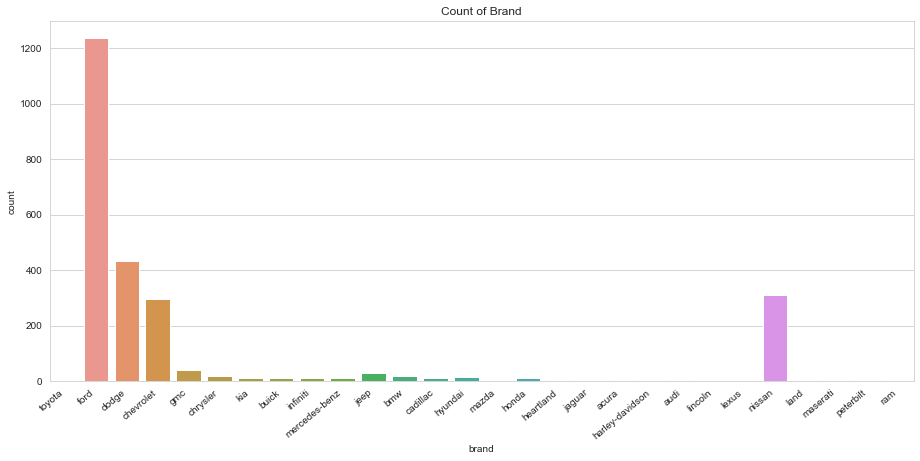

In [29]:
#Lookt at brands and count of cars 

fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='brand', data=df, ax=ax).set(title ='Count of Brand')


ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()


<AxesSubplot:xlabel='mileage', ylabel='price'>

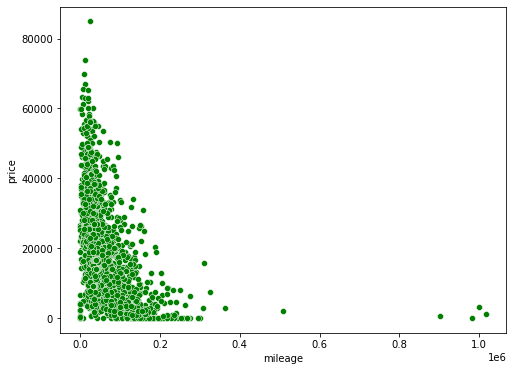

In [18]:
# milage of cars and their price
plt.figure(figsize = (8,6))
sns.scatterplot(x='mileage', y='price', data = df, color='green')

<AxesSubplot:xlabel='year', ylabel='price'>

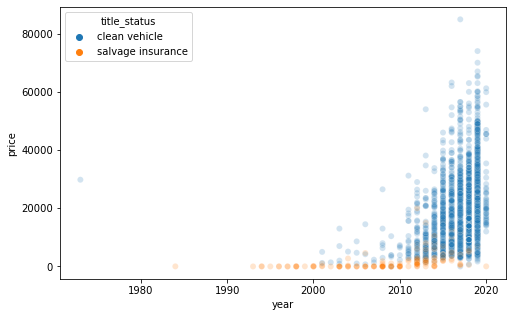

In [19]:
# Scatter plot with year and price
plt.figure(figsize=(8,5))
sns.scatterplot(x='year',y='price',data=df,hue='title_status',alpha=0.2)

<AxesSubplot:xlabel='price', ylabel='Count'>

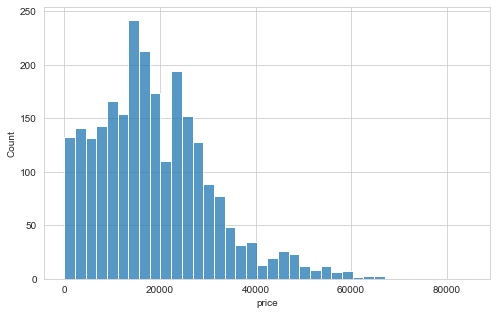

In [20]:
# Mileage distribution of cars
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.histplot(df['price'])